# *Lecture 2*
# Errors & Uncertainties in Computations

| |
|:---:|
|Selected content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|


## Follow-up on fixed point and floating-point representation

### Machine Precision

The limited precision of the representation can have a significant impact on numerical calculations.
In floating-point addition, the bits of the two mantissas are shifted so that the numbers have the same exponents in the floating-point representation.

In [1]:
1 + 1.0E-15

1.000000000000001

In [2]:
1 + 1.0E-16

1.0

In [14]:
100000000 + 1 + 1.0E-15

100000001.0

This is a lot less of a problem with the 64-bit representation (Python `float` or C++ `double`), but still something to keep in mind.

Our textbook definition of *machine precision* is "the maximum positive number that, on the computer, can be added to the number stored as 1 without changing that stored 1."

In other words, the machine precision $\epsilon_\text{m}$ is the largest $\epsilon$ so that $1_\text{c}+\epsilon_\text{m}=1_\text{c}$.

### Printing high-precision numbers

There are some interesting effects in Python that seem to contradict our expectations for the precision of `float`.

In [3]:
maxint = pow(2,63)-1
print(maxint)

9223372036854775807


In [4]:
from numpy import float32
maxint_as_float32 = float32(maxint)
print(maxint_as_float32)
print("%20.1f" % maxint_as_float32)
print("%20.19e" % maxint_as_float32)

9.223372e+18
9223372036854775808.0
9.2233720368547758080e+18


This is strange because we expected the `float32` to have 23 bits of mantissa (6-7 bits of decimal precision).  This number has 17 bits of precision, similar to a `float64`!

Did we misunderstand something about how Python handles floating-point numbers in the `print()` method?

In [5]:
almost_maxint = pow(2,63)-100000
print(almost_maxint)
almost_maxint_as_float32 = float32(almost_maxint)
print("%20.19e" % almost_maxint_as_float32)

9223372036854675808
9.2233720368547758080e+18


Compare the 32-bit floating point representations of these two integers that differ by 100000.

### Practicing floating-point representation

It is good practice to go through the conversion from decimal to floating-point, and *vice versa*.

**For the first example**, we'll write the maximum number possible in 32-bit floating-point representation.

$$
 x_{\textrm float} = (-1)^{s} \times 1.f \times 2^{e-{\rm bias}}
    ,$$

Remember that we have the following 32-bit representation:

| | *s* | *e* | *f* |
|- - -|- - -|:- - -:|:- - -:|
| Bit position| 31| 30 - 23| 22 -  0|

The sign bit *s* is in bit position 31, the biased exponent *e* is in
bits 30-23, and the fractional part of the mantissa *f* is in bits 22-0.

The maximum possible number would have 
* positive sign (s=0)
* e = 1111 1110 (254 in base 10) (255 is reserved for ["subnormal numbers"](http://mathworld.wolfram.com/SubnormalNumber.html))
* p (adjusted exponent) = 254 - bias = 254 - 127 = 127
* f = (1).1111 1111 1111 1111 1111 111

Is there a good way to convert this f-value to decimal form X.XXXXX?
I do not have a good Python function, but we can write a little code snippet to do it.

In this case, it's a long series of negative powers of 2: $1+\frac{1}{2} + \frac{1}{4} + \cdots$.
The f-value is approximately 2.

And don't forget that the exponent is on 2, not 10.

With all of the pieces put together, we have

$$(-1)^s \times 1.f\times 2^{p=e-127}        \simeq +2 \times 2^{127} \simeq 3.4 \times 10^{38}.\tag*{2.13}
$$

This matches our table from last time:

|*Name*| *Type* | *Bits* | *Bytes*| *Range*| 
|- - -|- - -|- - -|- - -|- - -|
|`int` |Integer | 32 | 4|-2,147,483,648 $\leftrightarrow$ +2,147,483,647| 
|`float` |Floating | 32 | 4 |$\pm 1.401298\times 10^{-45} \leftrightarrow \pm 3.402923\times 10^{+38}$| 
|`double`|Floating | 64 | 8 | $\pm 4.94065645841246544\times 10^{-324} \leftrightarrow \pm 1.7976931348623157\times 10^{+308}$| 

**For the second example**, we'll convert two decimal numbers to the floating-point representation.

An easy example is the number 2.125.  This can be written in powers of 2 as 

$$1 \times 2^1 + 0 \times 2^0 + 0 \times 2^{-1} + 0 \times 2^{-2} + 1 \times 2^{-3}$$

The binary representation is 10.001.

This is not acceptable for the IEEE representation, which requires a 1 to the immediate left of the binary point.  (This 1 is the *phantom bit*.)

$$10.001 = 1.0001 \times 2^1$$

The fields (32-bit definition) are then
* s = 0
* p = e - bias = 1
* e = 128<sub>10</sub> = 0100 0000
* f = (1).0001 = 0001 0000 0000 0000 0000 000

Therefore
2.125 = 0010 0000 0000 1000 0000 0000 0000 000

**A more challenging example** is 1000.10.  (This is decimal, not binary!)

Take some time to work through this now and write the IEEE 32-bit representation of this number.

Now we move to the material in Chapter 3.

## Types of Errors

Four general types of errors (the first two are trivial; the second two are important):

**1. Blunders or bad theory:** typographical errors entered with your
program or data, running the wrong program or having a fault in your
reasoning (theory).

**2. Random errors:** imprecision caused by events such as fluctuations
in electronics, cosmic rays, or someone pulling a plug.

**3. Approximation errors:** imprecision arising from simplifying the
mathematics so that a problem can be solved on the computer. For example, 

$$\begin{align}
\sin(x)  & =     \sum_{n=1}^{\infty}
\frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\quad\mbox{(exact)}  \\
   & \simeq   \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + {\cal E}(x,N) \quad \mbox{(algorithm),}  \tag*{3.2}
   \end{align}$$
   
For every reasonable approximation, the
approximation error should decrease as $N$ increases and should vanish in the
limit $N \rightarrow \infty$. In this case, obtaining a small approximation error requires large $N\gg x$. So if $x$ and $N$
are close in value, the approximation error will be large.

**4. Round-off errors:** imprecision arising from the finite number of
digits used to store floating-point numbers. The overall round-off
error accumulates as the computer handles more numbers.

For example, if your computer kept four decimal places, then it would store $\frac
{1}{3}$ as 0.3333 and $\frac{2}{3}$ as 0.6667, where the computer has
“rounded off” the last digit in $\frac{2}{3}$.

In practice, Python does the correct thing in this case.

In [6]:
2*(1/3) - (2/3)

0.0

In [18]:
import numpy as np
x = np.float32(1/3)
y = np.float32(2/3)
diff = np.float32(2*x - y)
print(x, y, diff)

0.33333334 0.6666667 0.0


The **roundoff error** depends completely on the representation of the number in the computer.  We absolutely expect that *there will be rounding at the least significant bits in the mantissa of a floating-point number*.

(This is in contrast to **approximation error**, which depends more on the size of terms that are left off in the approximation, for example, of an infinite series.  You have control over the approximation error, but not over the roundoff error.)

We will look at two cases of round-off error
* effect of round-off error on subtraction
* effect of round-off error on division



### Effect of Roundoff Error on Subtractive Cancellation

The computer representation
$x_c$ of an exact number $x$ can be defined as

$$x_c  \simeq  x (1 +\epsilon_{x}),$$
  
where $\epsilon_x$ is the relative error in *$x_c$.
(Our guess is that $\epsilon_x$ is basically the machine precision.)
Note that the $(1 +\epsilon_{x})$ factor defines $\epsilon_x$ as the *relative* error, as opposed to the *absolute* error.

If we attempt to perform a simple subtraction
$$a = b − c$$
the computer will actually use the representations of $a, b, c$:

$$\begin{align}
    a_{c}  & \simeq  b_c - c_c \\
    & \simeq b(1 + \epsilon_{b}) - c(1 +
    \epsilon_c)   \\
    \frac{a_c}{a} &   \simeq  1 +
    \epsilon_{b} \frac{b}{a} - \frac{c}{a} \epsilon_c
 \end{align}$$
The resulting error in $a$ is essentially a weighted average of the relative errors in $b$ and $c$.

(This is not quite the same thing we would see if we were subtracting two numbers with experimental uncertainties.  In that case, error propagation theory tells us that the uncertainties add in quadrature, not as a weighted average.)

For round-off error, the total uncertainty is 0 if the last two terms cancel, and this happens most easily if $b = c$ and $\epsilon_b = \epsilon_c$.  The problem is that we don't have any idea whether $\epsilon_b = \epsilon_c$ or not.  That all depends on the numbers themselves and their representation.

**Exercise**: Think about the representations of 2.1250000 and 2.1249999.  Are the two representations likely to have similar round-off errors?

Of special importance here is the observation that the
error in the answer $a_c$ increases when we subtract two nearly
equal numbers ($b \simeq c$) because then we are subtracting off the most
significant parts of both numbers and leaving the error-prone least-significant
parts: 

$$\begin{align}
\frac{a_c}{a} & =         1 + \epsilon_{a} \\
& \simeq  1 + \epsilon_{b} \frac{b}{a} - \frac{c}{a} \epsilon_c \\
& \simeq 1+
\frac{b}{a}(\epsilon_{b} - \epsilon_{c})\\
\end{align}$$

 This shows that even if the relative errors in $b$ and $c$ cancel
somewhat, they are multiplied by the large number $b/a$, which can
significantly magnify the error. Because we cannot assume any sign for
the errors, we must assume the worst \[the “max” error\].


In [19]:
2.1250000 - 2.1249999

9.999999983634211e-08

In [22]:
2.500000000 - 2.1250000000

0.375

In [27]:
2.1250000 - 2.1249

0.00010000000000021103

In [31]:
2.1250000 - 2.1249999

9.999999983634211e-08

In [30]:
2.1250000 - 2.1249999999999

9.992007221626409e-14

In [1]:
2.1250000 - 2.1250000000001

-9.992007221626409e-14

**Exercise**: Investigate the subtractive cancellation in the infinite series
$$e^{-x} = 1 − x + x^2/2!−x^3/3!+ \cdots$$

### Effect of Round-off Error on Division

The investigation of division is exactly parallel to the derivation for subtraction:

$$\begin{align}
   a_{c} & = \frac{b_{c}} {c_{c}} \\
         & = \frac{b(1+\epsilon_{b})}{c(1 + \epsilon_{c})}\\
\frac{a_{c}}{a}  & = \frac{1+\epsilon_{b}}{1 + \epsilon_{c}} \\
 &\simeq    (1 + \epsilon_{b})(1 - \epsilon_{c})\\
 &\simeq 1+ \epsilon_b -\epsilon_c \\
 &\simeq 1+ |\epsilon_b| + |\epsilon_c|
 \end{align}$$
 
The end result is that the round-off errors contribute linearly to the relative error on the product.  This makes sense because any digit in one factor is multipled by all of the other digits in the other factor.

By carefully estimating the round-off error, we can see if the *round-off error* or the *approximation error* dominates in a calculation.

For the most common infinite series (uniform convergent power series), one can add more terms to make the approximation error arbitrarily small.  But the *round-off error* will obviously come into play as the terms become smaller and smaller.

### Round-off Error Accumulation

There is a useful model for approximating how round-off error
accumulates in a calculation involving a large number of steps. 
Each step of a
calculation can be viewed as a literal “step” in a *random walk* around the true value.
This is because the numbers in the calculation can each have a large representation error or a small error.

The
total displacement $R$ after $N$ steps of length $r$, is, on the
average,

$$R \simeq \sqrt{N}  r$$

By analogy, the total relative error $\epsilon_\textrm{ro}$ arising after $N$
calculational steps, each with machine precision error $\epsilon_m$, is on
the average, 
$$\epsilon_\textrm{ro} \simeq \sqrt{N}      \epsilon_{m} .$$

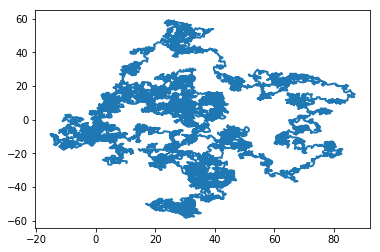

Displacement from origin is 27.79


In [11]:
% matplotlib inline
# A 2D Random Walk
import matplotlib.pyplot as plt
import random
import numpy as np

this_N = 10000

xvalues = []
yvalues = []
sum_of_R = 0

x=0
y=0 
for i in range(0, this_N):
    theta = random.uniform(0, 2*np.pi)
    x += np.cos(theta)
    y += np.sin(theta)
    xvalues.append(x)
    yvalues.append(y)
    R=np.sqrt(x*x+y*y)

plt.plot(xvalues, yvalues,'-', lw=2)
plt.show()
print("Displacement from origin is %.2f" % R)


**Exercise**: Now take this program and see what happens as `this_N` is increased.  This is $N$ from our equations.  Do you see $R$ increase as expected?  (Each $R$ is random, so you may have to run several trials for each `this_N` and take the average value of $R$.)

### Analyzing Algorithms for Approximation and Round-Off Errors

Let us assume that an algorithm takes *N* steps to find a good answer.
This "algorithm" may be an iterative solver or simply a series approximation to a function.

As a rule of thumb, the approximation error decreases
rapidly, often as some inverse power of the number of terms used. 

$$\epsilon_\textrm{app} \simeq   \frac{\alpha}{N^{\beta}}.$$

Here $\alpha$ and $\beta$ are some empirical constants that change for different
algorithms.  You can think of this form in the context of a uniform convergent power series, like the exponential function:

$$e^{-x} = 1 − x + \frac{x^2}{2!}−\frac{x^3}{3!} + \cdots$$

In contrast to algorithmic error, round-off error grows slowly and somewhat
randomly with $N$ (the random walk!)

$$\epsilon_\textrm{ro} \simeq \sqrt{N} \epsilon_{m}$$

The total error in a computation is the sum of the two types of errors:
    
$$\begin{align}
  \epsilon_\textrm{tot}   &=     \epsilon_\textrm{app}
   + \epsilon_\textrm{ro}   \\
  &   \simeq  \frac{\alpha}{N^{\beta}} + \sqrt{N} \epsilon_{m}
\end{align}$$

For small $N$ we expect the approximation error to be the larger of the two.
It should drop according to the power law above.
But as $N$ grows, the approximation error will be overcome by the growing round-off error.

Obviously we do not want to waste computer time calculating 1000 terms in a series if the round-off error becomes larger than the approximation error the extra terms are trying to fix.

The basic approach is to
* find out where the cross-over happens, and 
* cut off the approximation when the approximation error becomes negligible
* check to see whether another algorithm would allow for faster cut-off

Specifically, at some point you
should see that the mantissa of the answer changes only in the less
significant digits, with that place moving further to the right of the
decimal point as the calculation executes more steps. Eventually,
however, as the number of steps becomes even larger, round-off error
leads to a fluctuation in the less significant digits, with a gradual
move back toward the decimal point. It is best to quit the calculation before
this occurs.

<img src="Figures/Error_vs_N.png" width="80%">

It is also possible to adjust the algorithm itself to improve the convergence and avoid running into the "round-off regime."

In the next code snippet, we check the relative error of the exponential series for a large number of terms.
The thing to remember is that this series is the expansion about $x=0$, so it behaves very well for $x<1$.  (Even though its radius of convergence is all real numbers, that assumes we have a perfect calculator with no round-off error.)

Exact answer is 0.000045
N = 1
1.0
N = 2
-9.0
N = 3
41.0
N = 4
-125.66666666666669
N = 5
291.00000000000006
N = 6
-542.3333333333335
N = 7
846.5555555555557
N = 8
-1137.571428571429
N = 9
1342.5873015873017
N = 10
-1413.144620811288
N = 11
1342.5873015873017
N = 12
-1162.6235369568708
N = 13
925.0521618299399
N = 14
-680.8522218522223
N = 15
466.22233792075076
N = 16
-298.49403526123126
N = 17
179.4536979775075
N = 18
-101.69202745704473
N = 19
54.50004222881762
N = 20
-27.70631023742571
N = 21
13.396865995695954
N = 22
-6.176075067695315
N = 23
2.720716324755262
N = 24
-1.1474538458754235
N = 25
0.4642837252206955
N = 26
-0.18041130321775212
N = 27
0.06754832310472775
N = 28
-0.024288575533227746
N = 29
0.008510316837470645
N = 30
-0.002799646048977077
N = 31
0.0009703415798388302
N = 32
-0.00024578346171468825
N = 33
0.00013425561377078626
N = 34
1.9092257563066713e-05
N = 35
5.296383291827835e-05
N = 36
4.328623995964645e-05
N = 37
4.597446022593309e-05
N = 38
4.524791420801778e-05


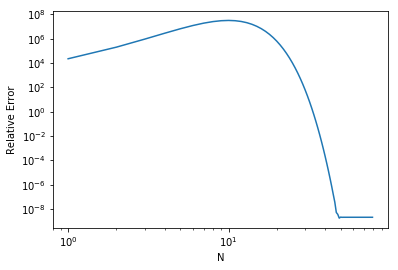

In [13]:
# exponential_good.py
# Calculate exp(-2)

import matplotlib.pyplot as plt
x=10.
relative_errors = []
N_values = []

exact_answer = np.exp(-x)
print("Exact answer is %f" % exact_answer)

for N in range (1, 80):
    print("N = %d" % N)
    sum = 1.
    term = 1.
    for n in range (1, N):
        term *= -x/n
        sum += term
    print(sum)
    N_values.append(N)
    relative_errors.append(abs((sum-exact_answer)/exact_answer))

plt.plot(N_values, relative_errors)
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.yscale('log')
plt.xscale('log')
plt.show()

**Exercise**: Repeat this exercise with $x=10$ instead of $x=0.5$.
* Does the series converge to the right value?  How do you know?
* If it does converge, is the rate of convergence the same as for $x=0.5$?
* If it does not converge, explain why not.

**Exercise**: Repeat this exercise with `numpy.float32` instead of the Python 64-bit float.  
* What do you expect to see?  
* Check the plot
* Where should you cut off your approximation?
* Does the answer change if we use $x=10$ instead of $x=0.5$?  Try it!